In [165]:
import numpy as np
import pandas as pd
import random

In [166]:
#Exploratory Data Analysis
dat=pd.read_csv('data.csv')
dat.shape

(80000, 26)

In [167]:
dat.iloc[:,5:].head()

,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,RENT,100100.0,Verified,Sep-2016,Current,debt_consolidation,SC,27.42,Jan-1976,690,...,Dec-2016,709,705,0,0,0,26.0,NaN,0,0.0
1,MORTGAGE,235000.0,Source Verified,Apr-2016,Current,home_improvement,PA,7.50,Jan-1995,670,...,Dec-2016,649,645,0,0,1,16.0,NaN,1,3.0
2,RENT,84000.0,Not Verified,Jan-2016,Current,debt_consolidation,FL,27.87,Aug-1998,735,...,Dec-2016,739,735,0,0,0,80.0,NaN,0,2.0
3,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,debt_consolidation,WV,21.65,Oct-1996,725,...,Oct-2016,749,745,0,0,0,NaN,42.0,0,NaN
4,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,debt_consolidation,OH,29.09,Nov-2000,660,...,Dec-2016,709,705,0,0,0,NaN,NaN,2,5.0


In [168]:
#We note there are a few outliers, especially within delinq_amnt and inq_last_12m...
dat.describe()

,id,loan_amnt,installment,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
count,8.000000e+04,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,41786.000000,14532.000000,80000.000000,37395.000000
mean,6.474229e+07,15055.793750,443.595158,7.778995e+04,19.446568,694.314000,698.314112,693.328225,686.068437,0.006488,16.692025,0.352275,33.964558,66.776356,0.565950,2.184009
std,1.488143e+07,8729.299624,255.693326,8.648673e+04,61.871127,30.744603,30.745156,58.631248,79.416694,0.084235,848.289643,0.942411,21.997469,25.205219,0.863342,2.473969
min,6.510400e+04,1000.000000,30.120000,0.000000e+00,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.389471e+07,8000.000000,258.100000,4.700000e+04,12.430000,670.000000,674.000000,669.000000,665.000000,0.000000,0.000000,0.000000,15.000000,50.000000,0.000000,0.000000
50%,6.571584e+07,13275.000000,382.500000,6.500000e+04,18.440000,685.000000,689.000000,699.000000,695.000000,0.000000,0.000000,0.000000,31.000000,68.000000,0.000000,1.000000
75%,7.612197e+07,20000.000000,585.080000,9.250000e+04,25.170000,710.000000,714.000000,729.000000,725.000000,0.000000,0.000000,0.000000,50.000000,83.000000,1.000000,3.000000
max,9.094516e+07,40000.000000,1536.950000,8.706582e+06,9999.000000,845.000000,850.000000,850.000000,845.000000,3.000000,110626.000000,39.000000,146.000000,119.000000,6.000000,36.000000


In [169]:
#The dates will need to be converted to proper datetime...
dat.dtypes

id                          int64
loan_amnt                   int64
term                       object
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
earliest_cr_line           object
fico_range_low              int64
fico_range_high             int64
last_credit_pull_d         object
last_fico_range_high        int64
last_fico_range_low         int64
acc_now_delinq              int64
delinq_amnt                 int64
delinq_2yrs                 int64
mths_since_last_delinq    float64
mths_since_last_record    float64
inq_last_6mths              int64
inq_last_12m              float64
dtype: object

In [170]:
#We note deefaults are a little less than 10% of outstanding samples...
dat.loan_status.value_counts()

Current       62429
Fully Paid    11534
Default        6037
Name: loan_status, dtype: int64

The most useful dependent variable is probably loan status, since it indicates default. However since it only indicates the CURRENT status of the loan, it may miss previous delinquencies on this same loan.

Because of this issue, I also considered to use the median change in FICO score, which should capture change in overall creditworthiness and severity of such change. However since it was not clear how updated the "last FICO score" is, this could have had undesireable effects and so I decided against this measure.

For simplicity we will consider all defaults equal. However depending on the business needs, we could potentially bucket defaults by different levels of severity, such as tying it to installment amount or term, or some combination of both.

In [1]:
#NA analysis
dat.isnull().sum(axis = 0)

NameError: name 'dat' is not defined

In [172]:
#Drop columns where >33% of values are NA

for i in list(dat):
    if dat.loc[:,i].isnull().sum()/dat.shape[0] > .33:
        dat.drop(i,axis=1,inplace=True)

In [173]:
#Randomly replace remaining NAs

def NA_randreplace(df):
    #Replaces NAs IN-PLACE by random selection
    for i in list(df):
        rows=pd.isnull(df.loc[:,i]) #NA detector
        index=rows.loc[rows==True].index #filter for NAs
        Nan_Index=df.loc[index,i].index #Targeted rows for replacement
        
        k=df.loc[:,i].isna().sum() #number of NAs to fill
        not_nas=list(df.loc[df.loc[:,i].notna(),i]) #Create Not-NAs pool to sample
        fill_list=random.choices(not_nas,k=k) #randomly select
        
        df.loc[Nan_Index,i]=fill_list #replace
        
NA_randreplace(dat)

print("No outstanding NAs remaining:")
print(dat.isnull().sum(axis = 0))

No outstanding NAs remaining:
id                      0
loan_amnt               0
term                    0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
last_credit_pull_d      0
last_fico_range_high    0
last_fico_range_low     0
acc_now_delinq          0
delinq_amnt             0
delinq_2yrs             0
inq_last_6mths          0
dtype: int64


In [174]:
#We also drop the following variables

#Issue_d - since the loans were issues within a relatively narrow timeframe (Jan '15 - Sep '16)
dat.drop('issue_d',axis=1,inplace=True)

#ID - remove an arbitrary identifiers
dat.drop('id',axis=1,inplace=True)

In [175]:
#Convert to datetime
dat['earliest_cr_line'] = dat['earliest_cr_line'].astype('datetime64')
dat['last_credit_pull_d'] = dat['last_credit_pull_d'].astype('datetime64')

In [176]:
#Convert EMPLOYMENT LENGTH labels into ordinal scale

print("Before:",dat.emp_length.unique(),"\n")

keys = dat.emp_length.unique()
values = [6,10,5,3,0,7,4,8,2,1,9]
dictionary = dict(zip(keys, values))

dat.loc[:,'emp_length'] = [dictionary[x] for x in dat.emp_length]

print("After:",dat.emp_length.unique())

Before: ['6 years' '10+ years' '5 years' '3 years' '< 1 year' '7 years' '8 years'
 '2 years' '1 year' '4 years' '9 years'] 

After: [ 6 10  5  3  0  7  4  8  2  1  9]


In [177]:
#Convert lOAN STATUS labels into non-default and default
print("Before:",dat.loan_status.unique(),"\n")

keys = dat.loan_status.unique()
values = [0,0,1]
dictionary = dict(zip(keys, values))

dat.loc[:,'loan_status'] = [dictionary[x] for x in dat.loan_status]

print("After:",dat.loan_status.unique())

Before: ['Current' 'Fully Paid' 'Default'] 

After: [0 1]


In [178]:
#Convert FICO scores into medians & ranges. Replace original fico variables with these new measures

#Convert:
fico_median = np.median((dat.fico_range_low,dat.fico_range_high),axis=0)
print("Since the range between high and low is so consistent, being almost all 4, we will not utilize it as a variable:","\n",np.unique(np.array(dat.fico_range_low-dat.fico_range_high), return_counts=True),"\n")

last_fico_median = np.median((dat.last_fico_range_low,dat.last_fico_range_high),axis=0)
print("Last_FICO ranges are different in that 1% of values have low of 0 and high of 499. This seems to represent some general bucket for very weak credit. Since there is not much variance within this category, making a range factor is probably not useful.")

#Replace:
dat=pd.concat((dat,pd.Series(fico_median,name='fico_median'),pd.Series(last_fico_median,name='last_fico_median')),axis=1)
dat.drop(['fico_range_low','fico_range_high','last_fico_range_low','last_fico_range_high'],axis=1,inplace=True)

Since the range between high and low is so consistent, being almost all 4, we will not utilize it as a variable: 
 (array([-5., -4.]), array([    9, 79991], dtype=int64)) 

Last_FICO ranges are different in that 1% of values have low of 0 and high of 499. This seems to represent some general bucket for very weak credit. Since there is not much variance within this category, making a range factor is probably not useful.


In [179]:
#Binarize TERM from 36 months & 60 months to 0 and 1 respectively 

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(dat.term)
dat.loc[:,'term']=lb.transform(dat.term.values).reshape(-1)

In [180]:
#Convert dates to age
record_date = pd.to_datetime('1/23/2017')
dat.loc[:,'earliest_cr_line']=abs(pd.Series(dat.earliest_cr_line-record_date).dt.days)
dat.loc[:,'last_credit_pull_d']=abs(pd.Series(dat.last_credit_pull_d-record_date).dt.days)

In [181]:
#Drop anachronistic variables
dat.drop(['last_fico_median','last_credit_pull_d'],axis=1,inplace=True)

In [182]:
#Resulting data (before encoding)
dat.head()

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,acc_now_delinq,delinq_amnt,delinq_2yrs,inq_last_6mths,fico_median
0,30000.0,1,761.64,6,RENT,100100.0,Verified,0,debt_consolidation,SC,27.42,14998,0.0,0.0,0.0,0.0,692.0
1,30000.0,1,692.93,10,MORTGAGE,235000.0,Source Verified,0,home_improvement,PA,7.50,8058,0.0,0.0,1.0,1.0,672.0
2,16000.0,1,379.39,6,RENT,84000.0,Not Verified,0,debt_consolidation,FL,27.87,6750,0.0,0.0,0.0,0.0,737.0
3,14000.0,0,439.88,5,RENT,50000.0,Source Verified,0,debt_consolidation,WV,21.65,7419,0.0,0.0,0.0,0.0,727.0
4,7500.0,0,252.67,3,MORTGAGE,68000.0,Not Verified,0,debt_consolidation,OH,29.09,5927,0.0,0.0,0.0,2.0,662.0


In [183]:
#Now codify the rest! (i.e. state, home ownership, verification status, purpose)
dat=pd.get_dummies(dat)

In [184]:
#Question 1 - C
#Single pairwise correlation between defaults and variables aren't strong...
R_sq=pd.Series([np.corrcoef(x, y_sm.T)[0][1]**2 for x in X_sm.T],index=x_train.columns)
R_sq.sort_values(ascending=False).head(10)

C:\Users\Anthony\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Anthony\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


fico_median                         0.042025
term                                0.015660
verification_status_Not Verified    0.015055
verification_status_Verified        0.009419
inq_last_6mths                      0.008529
purpose_debt_consolidation          0.007923
purpose_credit_card                 0.007354
earliest_cr_line                    0.007079
home_ownership_RENT                 0.005895
home_ownership_MORTGAGE             0.004859
dtype: float64

In [185]:
#Split, Standardize, Rebalance Train
from sklearn.model_selection import train_test_split
train, test = train_test_split(dat, test_size = 0.30,stratify=dat.loan_status, random_state = 43)

#Predictors
x_train=train.drop(columns='loan_status')
x_test=test.drop(columns='loan_status')

#Target
y_train = train.loc[:,"loan_status"]
y_test= test.loc[:,"loan_status"]


#Standardize data 0-1
from sklearn.preprocessing import StandardScaler

#Save column names
cols=list(x_train)

# #Scale the data
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train) 
x_test = std_scale.transform(x_test) 

#Return to pandas dataframe from numpy array
x_train=pd.DataFrame(x_train)
x_train.columns=cols
x_test=pd.DataFrame(x_test)
x_test.columns=cols

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.


In [186]:
#Compensate for class imbalances
##Using SMOTE to create synthetic new samples that are similar to existing default samples
##We now have a 50/50 split between defaults and non-defaults

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(x_train, y_train)

In [187]:
#Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state=0).fit(X_sm, y_sm)
y_pred = clf.predict(x_test)

print('Accuracy: ',np.round(clf.score(x_test, y_test),3))
print('Precision: ',np.round(confusion_matrix(y_test, y_pred)[1,1]/np.sum(confusion_matrix(y_test, y_pred)[:,1]),3))
print('Recall: ',np.round(confusion_matrix(y_test, y_pred)[1,1]/np.sum(confusion_matrix(y_test, y_pred)[1,:]),3))
confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred))

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  0.627
Precision:  0.116
Recall:  0.592


array([[0.58245833, 0.34208333],
       [0.03075   , 0.04470833]])

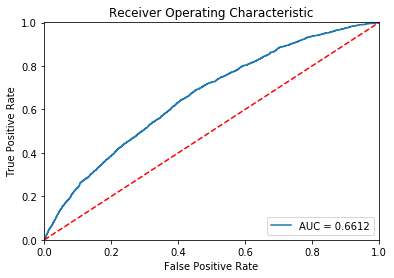

Optimal threshold:  0.5995275962609495
Accuracy:  0.779
Precision:  0.139
Recall:  0.372


array([[0.750625  , 0.17391667],
       [0.04741667, 0.02804167]])

In [188]:
#Optimize model threshold

#AUC
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1] ) #runs through various thresholds and results
roc_auc = auc(fpr, tpr) #calculated area under curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#Threshold
best_index=np.argmax(tpr-np.array(range(len(fpr)))/len(fpr))
threshold = thresholds[best_index]
print("Optimal threshold: ",threshold)

#Using the optimal threshold improves our score from 90% to 95%
#Precision increased but the true positive rate is lower
#To determine the optimal balance we need more information, specifically what is the ratio of average cost per default vs. profit from non-defaulter
new_pred=[1 if x>threshold else 0 for x in clf.predict_proba(x_test)[:,1] ]
confusion_matrix(y_test, new_pred)/np.sum(confusion_matrix(y_test, new_pred))


print('Accuracy: ',np.round((confusion_matrix(y_test, new_pred)[1,1]+confusion_matrix(y_test, new_pred)[0,0])/np.sum(confusion_matrix(y_test, new_pred)),3))
print('Precision: ',np.round(confusion_matrix(y_test, new_pred)[1,1]/np.sum(confusion_matrix(y_test, new_pred)[:,1]),3))
print('Recall: ',np.round(confusion_matrix(y_test, new_pred)[1,1]/np.sum(confusion_matrix(y_test, new_pred)[1,:]),3))
confusion_matrix(y_test, new_pred)/np.sum(confusion_matrix(y_test, new_pred))

Logistic Regression Conclusions: The first logistical regression fit captured more of the defaulters, but at the cost of many false positives. The second, optimized fit had less false positives and higher overall accuracy, but captured some less defaulters.

In [189]:
#Model 2 - Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

mdl=DecisionTreeClassifier(criterion='gini', 
                       splitter='best', 
                       max_depth=10, 
                       min_samples_split=2, 
                       min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, 
                       max_features=None, 
                       random_state=None, 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                       min_impurity_split=None, 
                       class_weight=None, 
                       presort=False)

#create a dictionary of parameters for grid search 
param_grid = {'max_features':[5,20,50,75],
'max_depth':[10,25,50],
'random_state':[11]}

#--------------------------------------
mygrid = GridSearchCV(mdl, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)
mygrid.fit(X_sm, y_sm)

print("The following are the most optimal parameters found within my grid search:","\n")
print(mygrid.best_params_,"\n" )
print("This represents the model to use:","\n")
print(mygrid.best_estimator_,"\n")

#Fit to best parameters
mytree=mygrid.best_estimator_
mytree.fit(X_sm, y_sm)

print("Train accuracy: ",mytree.score(x_train,y_train))
print("Test accuracy: ",mytree.score(x_test,y_test),"\n")
pred=mytree.predict(x_test)
print(confusion_matrix(y_test, pred),"\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:   55.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   56.1s finished


The following are the most optimal parameters found within my grid search: 

{'max_depth': 25, 'max_features': 75, 'random_state': 11} 

This represents the model to use: 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=75, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best') 

Train accuracy:  0.9776785714285714
Test accuracy:  0.8584583333333333 

[[20416  1773]
 [ 1624   187]] 



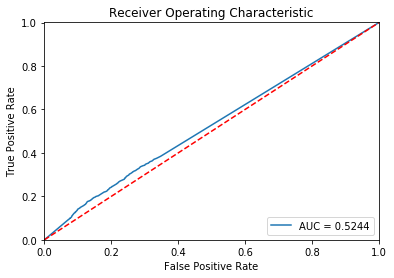

Optimal threshold:  1.0
Accuracy:  0.925
Precision:  nan
Recall:  0.0


C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in longlong_scalars


array([[0.92454167, 0.        ],
       [0.07545833, 0.        ]])

In [212]:
#AUC
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, mytree.predict_proba(x_test)[:,1] ) #runs through various thresholds and results
roc_auc = auc(fpr, tpr) #calculated area under curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

#Threshold
best_index=np.argmax(tpr[:-1]-np.array(range(len(fpr)))[:-1]/(len(fpr)-1))
threshold = thresholds[best_index]
print("Optimal threshold: ",threshold)

#Using the optimal threshold improves our score from 90% to 95%
#Precision increased but the true positive rate is lower
#To determine the optimal balance we need more information, specifically what is the ratio of average cost per default vs. profit from non-defaulter
new_pred=[1 if x>threshold else 0 for x in mytree.predict_proba(x_test)[:,1] ]
confusion_matrix(y_test, new_pred)/np.sum(confusion_matrix(y_test, new_pred))


print('Accuracy: ',np.round((confusion_matrix(y_test, new_pred)[1,1]+confusion_matrix(y_test, new_pred)[0,0])/np.sum(confusion_matrix(y_test, new_pred)),3))
print('Precision: ',np.round(confusion_matrix(y_test, new_pred)[1,1]/np.sum(confusion_matrix(y_test, new_pred)[:,1]),3))
print('Recall: ',np.round(confusion_matrix(y_test, new_pred)[1,1]/np.sum(confusion_matrix(y_test, new_pred)[1,:]),3))
confusion_matrix(y_test, new_pred)/np.sum(confusion_matrix(y_test, new_pred))

Tree Conclusions: It would seem the tree doesn't significantly outperform random chance, given by the low AUC

Final conclusions:
It would seem the problem is best modeled as linear with our logistic regression. 